# **Tesla Stock Price Prediction Using Machine Learning**

This project focuses on predicting **Tesla's stock price** for the next year using a **Linear Regression** model. The model is trained on four years of historical stock price data to forecast future prices, using linear regression to identify patterns and trends in the data.

In [ ]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
!pip install yfinance
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Loading Tesla data

tesla = yf.Ticker("TSLA")

# get all stock info
tesla.info

# get historical market data
hist = tesla.history(period="5y")
print(hist)

                                 Open        High         Low       Close  \
Date                                                                        
2019-09-04 00:00:00-04:00   15.126000   15.230667   14.614000   14.712000   
2019-09-05 00:00:00-04:00   14.833333   15.320000   14.723333   15.305333   
2019-09-06 00:00:00-04:00   15.146667   15.309333   15.011333   15.163333   
2019-09-09 00:00:00-04:00   15.333333   15.584000   15.282000   15.452667   
2019-09-10 00:00:00-04:00   15.386667   15.702667   15.262667   15.702667   
...                               ...         ...         ...         ...   
2024-08-28 00:00:00-04:00  209.720001  211.839996  202.589996  205.750000   
2024-08-29 00:00:00-04:00  209.800003  214.889999  205.970001  206.279999   
2024-08-30 00:00:00-04:00  208.630005  214.570007  207.029999  214.110001   
2024-09-03 00:00:00-04:00  215.259995  219.899994  209.639999  210.600006   
2024-09-04 00:00:00-04:00  210.759995  222.220001  210.619995  220.479996   

## Data preprocessing

In [ ]:
# Kepping close prices only
data = hist.reset_index()['Close']
print(data)

0        14.712000
1        15.305333
2        15.163333
3        15.452667
4        15.702667
           ...    
1254    205.750000
1255    206.279999
1256    214.110001
1257    210.600006
1258    220.479996
Name: Close, Length: 1259, dtype: float64


In [ ]:
#Scaling the close price data
scalar = MinMaxScaler(feature_range=(0,1))
reshaped_data = data.values.reshape(-1, 1)
scaled_data = scalar.fit_transform(reshaped_data)
print(data)

0        14.712000
1        15.305333
2        15.163333
3        15.452667
4        15.702667
           ...    
1254    205.750000
1255    206.279999
1256    214.110001
1257    210.600006
1258    220.479996
Name: Close, Length: 1259, dtype: float64


In [ ]:
# Split into 4 years and past 1 year plus 50 days
data_4y = scaled_data[:-252]  # Assuming approximately 252 trading days in a year
data_rest = scaled_data[-302:]

print("Data for the past 4 years:")
print(len(data_4y))
print(data_4y)

print("\nData for the past 1 year plus 50 days:")
print(len(data_rest))
print(data_rest)

Data for the past 4 years:
1007
[[0.        ]
 [0.00150113]
 [0.00114187]
 ...
 [0.61273394]
 [0.61571932]
 [0.58265233]]

Data for the past 1 year plus 50 days:
302
[[0.61197498]
 [0.57263358]
 [0.59580832]
 [0.61106414]
 [0.61425196]
 [0.625055  ]
 [0.67072142]
 [0.67745121]
 [0.66242304]
 [0.65708472]
 [0.64489013]
 [0.64534559]
 [0.65091153]
 [0.6658638 ]
 [0.6746682 ]
 [0.69743814]
 [0.7049269 ]
 [0.69966455]
 [0.6279139 ]
 [0.62062751]
 [0.64349867]
 [0.6339353 ]
 [0.63158242]
 [0.60972328]
 [0.6368701 ]
 [0.63937477]
 [0.62328405]
 [0.60567528]
 [0.61885656]
 [0.60504278]
 [0.59894549]
 [0.594518  ]
 [0.57551777]
 [0.58348723]
 [0.57668154]
 [0.56936986]
 [0.55216594]
 [0.53354519]
 [0.51740382]
 [0.50796696]
 [0.54791553]
 [0.55274783]
 [0.5620329 ]
 [0.54477833]
 [0.56640978]
 [0.5669917 ]
 [0.61344234]
 [0.61273394]
 [0.61571932]
 [0.58265233]
 [0.61169664]
 [0.60013459]
 [0.59904671]
 [0.59148202]
 [0.65493421]
 [0.63950131]
 [0.64916583]
 [0.66115805]
 [0.65698357]
 [0.6339

In [ ]:
# Training and Testing data
prediction_days = 50

X_train = []
Y_train = []
for x in range(prediction_days, len(data_4y)):
  X_train.append(data_4y[x-prediction_days:x, 0])
  Y_train.append(data_4y[x, 0])

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.        ]
  [0.00150113]
  [0.00114187]
  ...
  [0.01964287]
  [0.02098376]
  [0.02180011]]

 [[0.00150113]
  [0.00114187]
  [0.00187388]
  ...
  [0.02098376]
  [0.02180011]
  [0.0211558 ]]

 [[0.00114187]
  [0.00187388]
  [0.00250638]
  ...
  [0.02180011]
  [0.0211558 ]
  [0.02170228]]

 ...

 [[0.65713537]
  [0.61921072]
  [0.63224017]
  ...
  [0.56640978]
  [0.5669917 ]
  [0.61344234]]

 [[0.61921072]
  [0.63224017]
  [0.61197498]
  ...
  [0.5669917 ]
  [0.61344234]
  [0.61273394]]

 [[0.63224017]
  [0.61197498]
  [0.57263358]
  ...
  [0.61344234]
  [0.61273394]
  [0.61571932]]]


## Build the model

In [ ]:
# Model building
model = LinearRegression()
X_train_2d = X_train.reshape(X_train.shape[0], -1)
model.fit(X_train_2d, Y_train)

score1 = mean_squared_error(Y_train, model.predict(X_train_2d))
score2 = r2_score(Y_train, model.predict(X_train_2d))

print("The mean squared error of Training data:", score1)
print("The r2 error of Testing data:", score2)



The mean squared error of Training data: 0.00041706001875039346
The r2 error of Testing data: 0.9925104534618515


## Test data prediction

In [ ]:
# New Test data
X_test = []

for x in range(prediction_days, len(data_rest)):
  X_test.append(data_rest[x-prediction_days:x, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Predicting test data
X_test_2d = X_test.reshape(X_test.shape[0], -1)
predicted_price = model.predict(X_test_2d)
predicted_price = predicted_price.reshape(-1, 1)
predicted_price = scalar.inverse_transform(predicted_price)
print(predicted_price)

[[247.44407596]
 [256.20510773]
 [252.7329824 ]
 [254.94249276]
 [246.02750807]
 [270.8013746 ]
 [262.82050396]
 [274.39682093]
 [278.93749833]
 [277.86007663]
 [265.12985989]
 [265.77986535]
 [257.31314544]
 [257.05628517]
 [248.10239858]
 [246.94855676]
 [246.4081497 ]
 [237.97255968]
 [245.28138168]
 [248.54437606]
 [253.36730972]
 [249.17216432]
 [263.16671005]
 [256.49705285]
 [260.13634268]
 [261.24871285]
 [262.85284369]
 [262.21493389]
 [264.43850092]
 [250.57527352]
 [254.80035217]
 [251.19380064]
 [239.4293545 ]
 [220.10907819]
 [213.73601436]
 [211.60983836]
 [216.72251081]
 [210.62458397]
 [205.21352312]
 [204.60950922]
 [198.63651667]
 [198.72734706]
 [209.22671058]
 [215.99870427]
 [220.24519329]
 [218.23974863]
 [221.99208601]
 [225.77535218]
 [212.6842919 ]
 [212.1497569 ]
 [224.969281  ]
 [236.34938922]
 [243.30659899]
 [234.15546047]
 [238.6176256 ]
 [234.60560432]
 [234.43108342]
 [231.82224193]
 [237.82852132]
 [239.607713  ]
 [249.35601874]
 [245.74891946]
 [240.96

In [ ]:
data_pr = data[-252:]
print(data_pr)
data_pr.index = range(252)
print(data_pr)

1007    256.489990
1008    251.919998
1009    251.490005
1010    248.500000
1011    273.579987
           ...    
1254    205.750000
1255    206.279999
1256    214.110001
1257    210.600006
1258    220.479996
Name: Close, Length: 252, dtype: float64
0      256.489990
1      251.919998
2      251.490005
3      248.500000
4      273.579987
          ...    
247    205.750000
248    206.279999
249    214.110001
250    210.600006
251    220.479996
Name: Close, Length: 252, dtype: float64


In [ ]:
score1 = mean_squared_error(data_pr, predicted_price)
score2 = r2_score(data_pr, predicted_price)

print("The mean squared error of Testing data:", score1)
print("The r2 error of Testing data:", score2)

The mean squared error of Testing data: 56.60752940269235
The r2 error of Testing data: 0.9465402053564933


## Test data prediction comparison

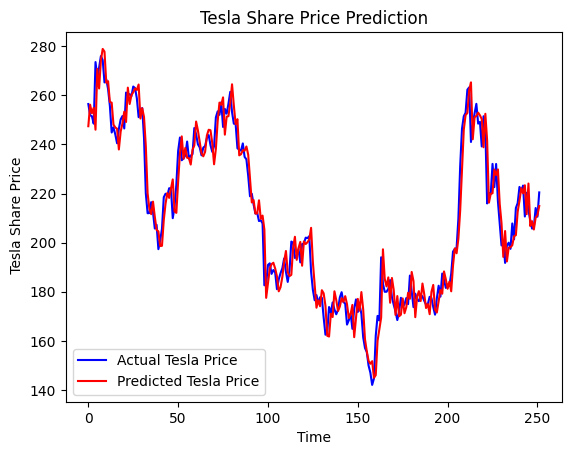

In [ ]:
# Plot the test predictions

plt.plot(data_pr, color='blue', label='Actual Tesla Price')
plt.plot(predicted_price, color='red', label='Predicted Tesla Price')
plt.title(f'Tesla Share Price Prediction')
plt.xlabel('Time')
plt.ylabel(f' Tesla Share Price')
plt.legend()
plt.show()